In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
SPOTIPY_CLIENT_ID = 'bd88fe788a574f64a9e8f9c13f71ade1'
SPOTIPY_CLIENT_SECRET = 'd23195da77ba4d4c8531bc64ad14bf56'
#SPOTIPY_REDIRECT_URL = 'your-app-redirect-url'

In [5]:
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

## Searching Tracks

In [6]:
results = sp.search(q='track:'+'baby',type='track',limit=20)

In [7]:
len(results)

1

In [8]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=track%3Ababy&type=track&offset=0&limit=20',
 'items': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
      'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
      'id': '3TVXtAsR1Inumwj472S9r4',
      'name': 'Drake',
      'type': 'artist',
      'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
 

In [9]:
print(len(results['tracks']))

7


In [10]:
results['tracks']['items']

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',
    'GH',
    'GM',
    'GN',
    'GQ',
    'GR'

In [11]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

Wants and Needs (feat. Lil Baby) - By - Drake
Track ID: 65OVbaJR5O1RmwOQx0875b / Artist ID - 3TVXtAsR1Inumwj472S9r4
------
Drip Too Hard (Lil Baby & Gunna) - By - Lil Baby
Track ID: 78QR3Wp35dqAhFEc2qAGjE / Artist ID - 5f7VJjfbwm532GiveGC0ZK
------
INDUSTRY BABY (feat. Jack Harlow) - By - Lil Nas X
Track ID: 27NovPIUIRrOZoCHxABJwK / Artist ID - 7jVv8c5Fj3E9VhNjxT4snq
------
Sleazy Flow (with Lil Baby) - Remix - By - SleazyWorld Go
Track ID: 5cx7vkF8BQ0iOsVpfvZbnz / Artist ID - 7FOQfJbC3e4GNoheojERnF
------
Girls Want Girls (with Lil Baby) - By - Drake
Track ID: 37Nqx7iavZpotJSDXZWbJ3 / Artist ID - 3TVXtAsR1Inumwj472S9r4
------
Baby - By - Justin Bieber
Track ID: 6epn3r7S14KUqlReYr77hA / Artist ID - 1uNFoZAHBGtllmzznpCI3s
------
For The Night (feat. Lil Baby & DaBaby) - By - Pop Smoke
Track ID: 0PvFJmanyNQMseIFrU708S / Artist ID - 0eDvMgVFoNV3TpwtrVCoTj
------
INDUSTRY BABY (feat. Jack Harlow) - By - Lil Nas X
Track ID: 5Z9KJZvQzH6PFmb8SNkxuk / Artist ID - 7jVv8c5Fj3E9VhNjxT4snq
------


In [12]:
song_id = '27NovPIUIRrOZoCHxABJwK'

## Generating token for recommendation


In [13]:
import requests
import base64

In [14]:
def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [15]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)

In [16]:
token

'BQAuX-suB5NdbqP526NVHuD2xQ41XLHTh4-CY1xri47_oZknqtVVld3O_F0RsYVN5K0iIfH6nSByfh3Iqo0l1V2jQwzSQFEIwbqst06jyTRCJl7Opcs'

In [17]:
def get_track_recommendations(seed_tracks,token):
    limit = 10
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()


In [18]:
json_response = get_track_recommendations(song_id,token)

In [19]:
json_response

{'tracks': [{'album': {'album_type': 'SINGLE',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4kYSro6naA4h99UJvo89HB'},
      'href': 'https://api.spotify.com/v1/artists/4kYSro6naA4h99UJvo89HB',
      'id': '4kYSro6naA4h99UJvo89HB',
      'name': 'Cardi B',
      'type': 'artist',
      'uri': 'spotify:artist:4kYSro6naA4h99UJvo89HB'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FJ',
     'FM',
     'FR',
     'GA',
    

In [20]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"Up" by(Cardi B)
"20 Min" by(Lil Uzi Vert)
"Daisy" by(Ashnikko)
"LOT OF ME" by(Lil Tecca)
"Cabo" by(Bankrol Hayden)
"All Night - Slowed N Reverb" by(The Vamps)
"DAYWALKER! (feat. CORPSE)" by(Machine Gun Kelly)
"Prada (feat. Lil Tecca)" by(24kGoldn)
"Red Eye (feat. TroyBoi)" by(Justin Bieber)
"Wild Side (feat. Cardi B)" by(Normani)


In [21]:
recolist = json_response['tracks']
print(len(recolist))

10


In [22]:
recolist[0]

{'album': {'album_type': 'SINGLE',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4kYSro6naA4h99UJvo89HB'},
    'href': 'https://api.spotify.com/v1/artists/4kYSro6naA4h99UJvo89HB',
    'id': '4kYSro6naA4h99UJvo89HB',
    'name': 'Cardi B',
    'type': 'artist',
    'uri': 'spotify:artist:4kYSro6naA4h99UJvo89HB'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   

In [23]:
import pandas as pd

In [24]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,156944,True,{'isrc': 'USAT22100061'},{'spotify': 'https://open.spotify.com/track/1M...,https://api.spotify.com/v1/tracks/1M4OcYkxAtu3...,1M4OcYkxAtu3ErzSgDEfoi,False,Up,71,https://p.scdn.co/mp3-preview/c71424ce4db24cfb...,2,track,spotify:track:1M4OcYkxAtu3ErzSgDEfoi
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,220586,True,{'isrc': 'USAT21704166'},{'spotify': 'https://open.spotify.com/track/0u...,https://api.spotify.com/v1/tracks/0uxSUdBrJy9U...,0uxSUdBrJy9Un0EYoBowng,False,20 Min,84,https://p.scdn.co/mp3-preview/952010a1ba3befbc...,20,track,spotify:track:0uxSUdBrJy9Un0EYoBowng
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,146523,True,{'isrc': 'GBAYE2000596'},{'spotify': 'https://open.spotify.com/track/2g...,https://api.spotify.com/v1/tracks/2g1KggY9PKvs...,2g1KggY9PKvsoEAOaiz4xx,False,Daisy,72,https://p.scdn.co/mp3-preview/7a0e7ee9598680b5...,1,track,spotify:track:2g1KggY9PKvsoEAOaiz4xx
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,123870,False,{'isrc': 'USUM72113387'},{'spotify': 'https://open.spotify.com/track/2Z...,https://api.spotify.com/v1/tracks/2ZXxRC6V6AXz...,2ZXxRC6V6AXzMdbLQZMHSB,False,LOT OF ME,76,None,12,track,spotify:track:2ZXxRC6V6AXzMdbLQZMHSB
4,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,158857,True,{'isrc': 'USAT22102587'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3SLu421u9hMK...,3SLu421u9hMKwcFNxGFrGk,False,Cabo,66,https://p.scdn.co/mp3-preview/3fbf0f042de2c9a4...,1,track,spotify:track:3SLu421u9hMKwcFNxGFrGk
5,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,244797,False,{'isrc': 'GBUM72004348'},{'spotify': 'https://open.spotify.com/track/1g...,https://api.spotify.com/v1/tracks/1gk5o5yEXAsH...,1gk5o5yEXAsHeXMJoavmh3,False,All Night - Slowed N Reverb,66,None,3,track,spotify:track:1gk5o5yEXAsHeXMJoavmh3
6,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,137746,True,{'isrc': 'USUM72102268'},{'spotify': 'https://open.spotify.com/track/2N...,https://api.spotify.com/v1/tracks/2NnJpRXIlx35...,2NnJpRXIlx35Vij3bPZO0h,False,DAYWALKER! (feat. CORPSE),69,None,1,track,spotify:track:2NnJpRXIlx35Vij3bPZO0h
7,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,151585,True,{'isrc': 'USQX92103580'},{'spotify': 'https://open.spotify.com/track/4w...,https://api.spotify.com/v1/tracks/4wuMS7NGVbU7...,4wuMS7NGVbU7hdu94K5icd,False,Prada (feat. Lil Tecca),67,https://p.scdn.co/mp3-preview/2c60f6848adeaf54...,1,track,spotify:track:4wuMS7NGVbU7hdu94K5icd
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,187452,False,{'isrc': 'USUM72102641'},{'spotify': 'https://open.spotify.com/track/24...,https://api.spotify.com/v1/tracks/24OeEKPQ8qqN...,24OeEKPQ8qqNZnPevRHxUT,False,Red Eye (feat. TroyBoi),70,None,23,track,spotify:track:24OeEKPQ8qqNZnPevRHxUT
9,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify'

In [25]:
reco_df = recommendation_result[['name', 'explicit', 'duration_ms', 'popularity']]
# 'release_date'

In [26]:
reco_df

,name,explicit,duration_ms,popularity
0,Up,True,156944,71
1,20 Min,True,220586,84
2,Daisy,True,146523,72
3,LOT OF ME,False,123870,76
4,Cabo,True,158857,66
5,All Night - Slowed N Reverb,False,244797,66
6,DAYWALKER! (feat. CORPSE),True,137746,69
7,Prada (feat. Lil Tecca),True,151585,67
8,Red Eye (feat. TroyBoi),False,187452,70
9,Wild Side (feat. Cardi B),True,209476,73


In [27]:
reco_df.describe()

,duration_ms,popularity
count,10.000000,10.000000
mean,173783.600000,71.400000
std,39758.311431,5.460973
min,123870.000000,66.000000
25%,147788.500000,67.500000
50%,157900.500000,70.500000
75%,203970.000000,72.750000
max,244797.000000,84.000000


In [28]:
reco_df.dtypes

name           object
explicit         bool
duration_ms     int64
popularity      int64
dtype: object

In [29]:
reco_df['explicit']

0     True
1     True
2     True
3    False
4     True
5    False
6     True
7     True
8    False
9     True
Name: explicit, dtype: bool

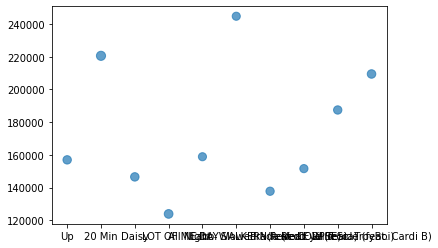

In [30]:
import matplotlib.pyplot as plt
import numpy as np

    
x = reco_df['name']
y = reco_df['duration_ms']
s = reco_df['popularity']
    
plt.scatter(x, y, s, alpha=0.7) # c=reco_df['explicit']
# show the graph
plt.show()

In [31]:
reco_df['duration_sec'] = round(reco_df['duration_ms'] / 1000, 0)


<ipython-input-31-1a089067ae8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['duration_sec'] = round(reco_df['duration_ms'] / 1000, 0)


In [32]:
reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)

<ipython-input-32-bb5ce2f680e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)


In [33]:
reco_df

,name,explicit,duration_ms,popularity,duration_sec,popularity_range
0,Up,True,156944,71,157.0,6
1,20 Min,True,220586,84,221.0,19
2,Daisy,True,146523,72,147.0,7
3,LOT OF ME,False,123870,76,124.0,11
4,Cabo,True,158857,66,159.0,1
5,All Night - Slowed N Reverb,False,244797,66,245.0,1
6,DAYWALKER! (feat. CORPSE),True,137746,69,138.0,4
7,Prada (feat. Lil Tecca),True,151585,67,152.0,2
8,Red Eye (feat. TroyBoi),False,187452,70,187.0,5
9,Wild Side (feat. Cardi B),True,209476,73,209.0,8


In [34]:
# Try:
#reco_df["popularity"] - (reco_df['popularity'].min() - 1)

In [35]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


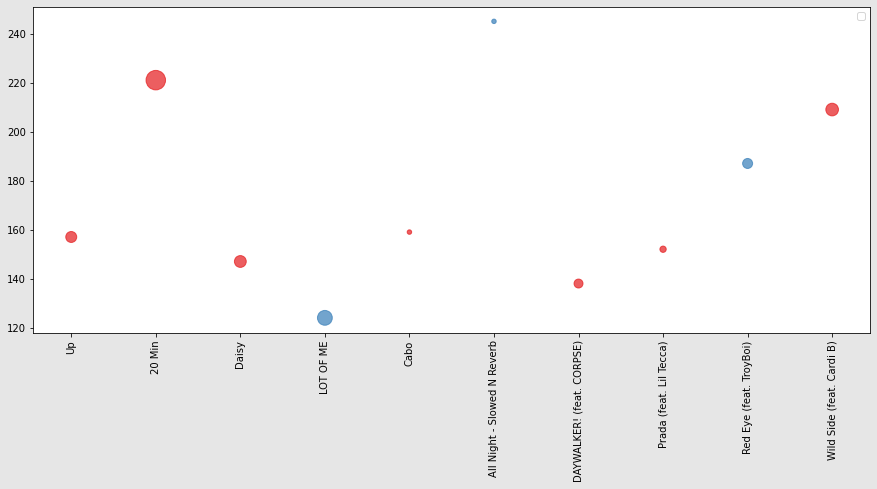

In [36]:
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))    

x = reco_df['name']
y = reco_df['duration_sec']
s = reco_df['popularity_range']*20
    
color_labels = reco_df['explicit'].unique()
rgb_values = sns.color_palette("Set1", 8)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=reco_df['explicit'].map(color_map))
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()